# Araç Fiyat Tahmini ve Kullanıcı Tercihlerine Göre Modelleme

## Proje Adımları

### 1. Veri İlk Temas
Bu aşamada, projemizin temelini oluşturan veri setine ilk kez temas edilir. Verinin yapısı, türü ve içeriği hakkında genel bir anlayış geliştirilir. Bu adımda, veri seti üzerinde temel incelemeler yapılır, eksik veya hatalı veriler belirlenir ve veri analizi için gerekli ilk hazırlıklar gerçekleştirilir.

### 2. Veri Görselleştirme
Veri görselleştirme aşamasında, veri setindeki bilgilerin daha iyi anlaşılması için çeşitli grafikler ve görsel araçlar kullanılır. Bu adımda, veri içindeki trendler, ilişkiler ve dağılımlar görsel olarak temsil edilir. Grafikler, histogramlar, scatter plotlar gibi çeşitli görselleştirme teknikleri kullanılarak verinin anlaşılması kolaylaştırılır.

### 3. Model Kurma
Model kurma aşamasında, veriyi analiz etmek ve tahminler yapmak için uygun makine öğrenme modelleri oluşturulur. Bu adımda, çeşitli modeller (örneğin, regresyon, sınıflandırma, vb.) seçilir ve eğitilir. Modelin performansını değerlendirmek için çapraz doğrulama ve hiperparametre ayarları yapılır. Bu süreç, modelin veriye nasıl uyduğunu ve tahmin performansını değerlendirmek için kritik öneme sahiptir.

### 4. Tahmin Yaptırma
Model kurma aşamasında elde edilen modeller ile tahminler yapılır. Bu adımda, modelin performansı test edilir ve gerçek veri üzerinde tahminler yapılır. Tahmin sonuçları, modelin doğruluğunu ve verinin ne kadar iyi temsil edildiğini değerlendirmek için kullanılır. Bu aşamada elde edilen sonuçlar, modelin uygulanabilirliği hakkında bilgi sağlar.

### 5. GUI ile Kullanıcı Tercihine Göre Tahmin Yapma
Kullanıcıların modelden tahminler alabilmesi için bir grafiksel kullanıcı arayüzü (GUI) oluşturulur. Bu aşamada, tkinter gibi araçlar kullanılarak kullanıcı dostu bir arayüz tasarlanır. Kullanıcı, bu arayüz aracılığıyla araç bilgilerini girer veya seçer ve model tarafından yapılan tahminleri görüntüler. GUI, kullanıcı deneyimini artırmak ve etkileşimi kolaylaştırmak için tasarlanır.

### 6. Sonuç
Projenin bu son aşamasında, yapılan tahminler ve analizler özetlenir. Elde edilen sonuçlar değerlendirilir ve projenin genel başarısı hakkında bir değerlendirme yapılır. Bu adımda, kullanıcı arayüzü ve model performansı gözden geçirilir, elde edilen sonuçlar yorumlanır ve projenin güçlü ve zayıf yönleri hakkında bilgi verilir. Sonuçlar, projenin amacına ulaşıp ulaşmadığını belirlemek ve gelecekteki geliştirmeler için öneriler sunmak için kullanılır.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\realb\Desktop\Nissan araç almada yardımcı model\data\nissan-dataset.csv")

###  Veriye ilk temas

In [7]:
df.head()

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,2,Lenee Eteen,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,3,Kendal Esselin,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,4,Nehemiah Marvelley,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,5,Domenic McGeouch,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22


In [8]:
df.tail()

,id,full_name,age,gender,model,color,performance,km,condition,price
9995,9996,Mike Wilson,63.0,Polygender,Juke,Yellow,339.0,715741.0,new,19710.18
9996,9997,Katie Wilson,45.0,Female,Maxima,Gray,81.0,786768.0,bad,47797.76
9997,9998,Jane Davis,27.0,Female,Leaf,Yellow,130.0,99170.0,very bad,35058.91
9998,9999,Katie Smith,68.0,Male,March / Micra,Green,215.0,640764.0,old,21176.71
9999,10000,Katie Smith,69.0,Male,March / Micra,Green,215.0,640764.0,old,21177.71


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5000.500000,2886.895680,1.00,2500.75,5000.50,7500.25,10000.00
age,9154.0,43.041730,14.776421,18.00,31.00,43.00,56.00,69.00
performance,9143.0,197.783332,112.779620,0.00,101.50,196.00,296.00,399.00
km,9141.0,503033.441418,284967.128714,808.00,258002.00,500903.00,748421.00,999915.00
price,9159.0,27365.125341,13598.200111,5000.25,15956.49,27296.05,38370.19,223980.33


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  int64  
 1   full_name    9157 non-null   object 
 2   age          9154 non-null   float64
 3   gender       9144 non-null   object 
 4   model        9130 non-null   object 
 5   color        9139 non-null   object 
 6   performance  9143 non-null   float64
 7   km           9141 non-null   float64
 8   condition    9151 non-null   object 
 9   price        9159 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [14]:
df.columns

Index(['id', 'full_name', 'age', 'gender', 'model', 'color', 'performance',
       'km', 'condition', 'price'],
      dtype='object')

### Veri Görselleştirmesi

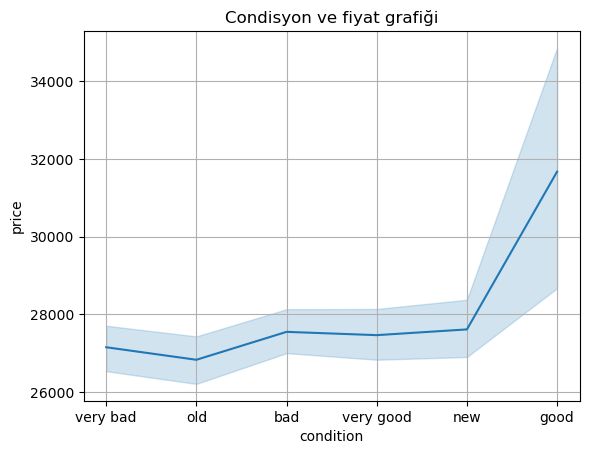

In [18]:
sns.lineplot(x = "condition", y = "price", data = df);
plt.title("Condisyon ve fiyat grafiği");
plt.grid(True);

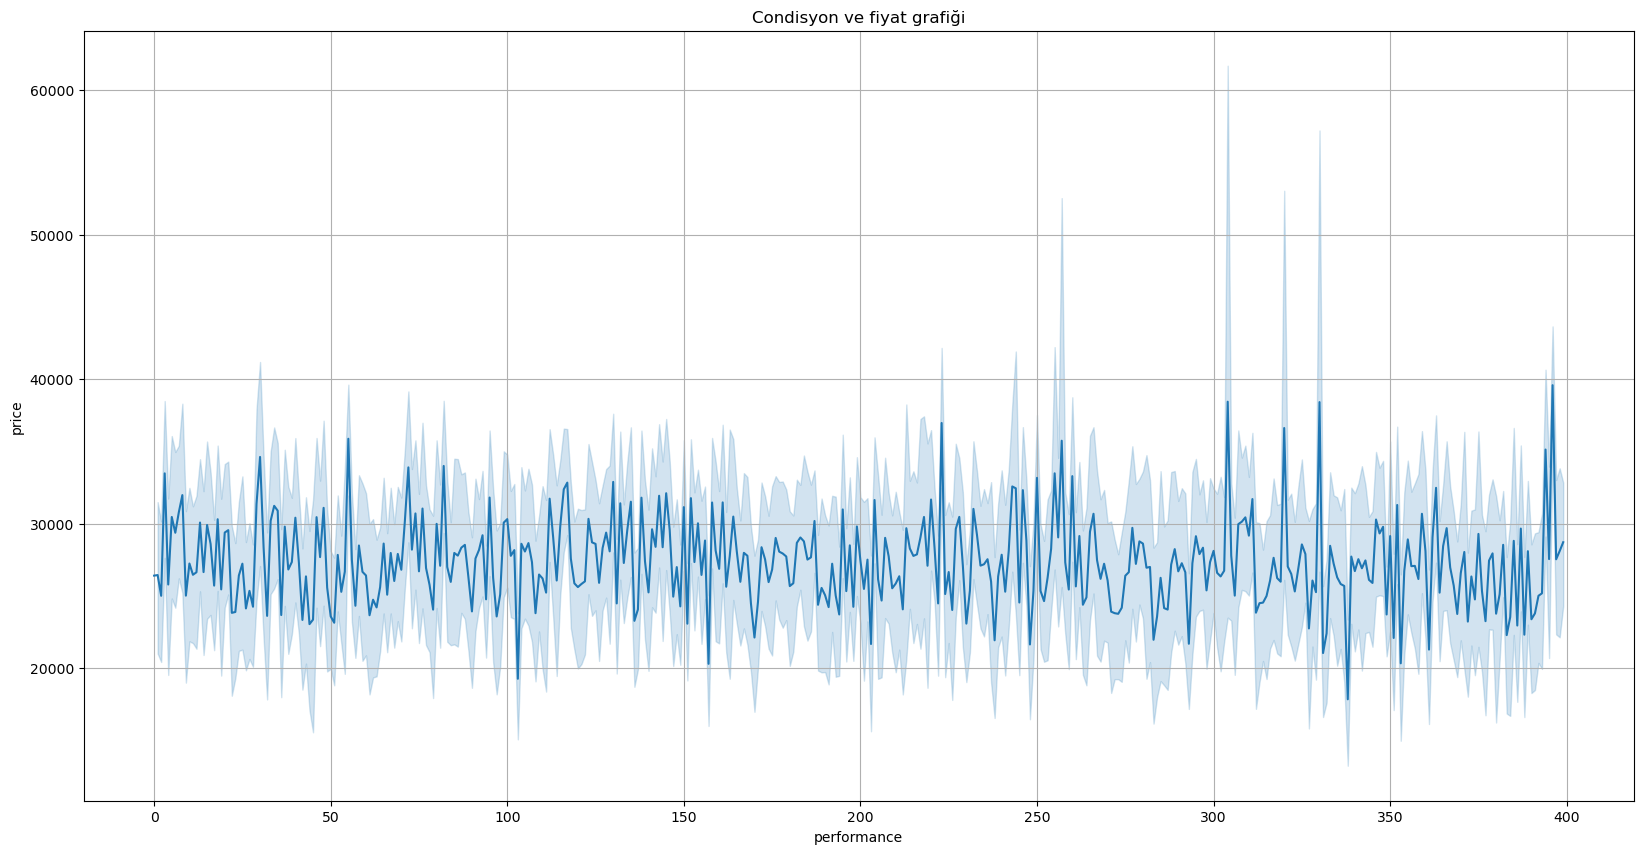

In [26]:
plt.figure(figsize=(20,10))

sns.lineplot(x = "performance", y = "price", data = df);
plt.title("Condisyon ve fiyat grafiği");
plt.grid(True);

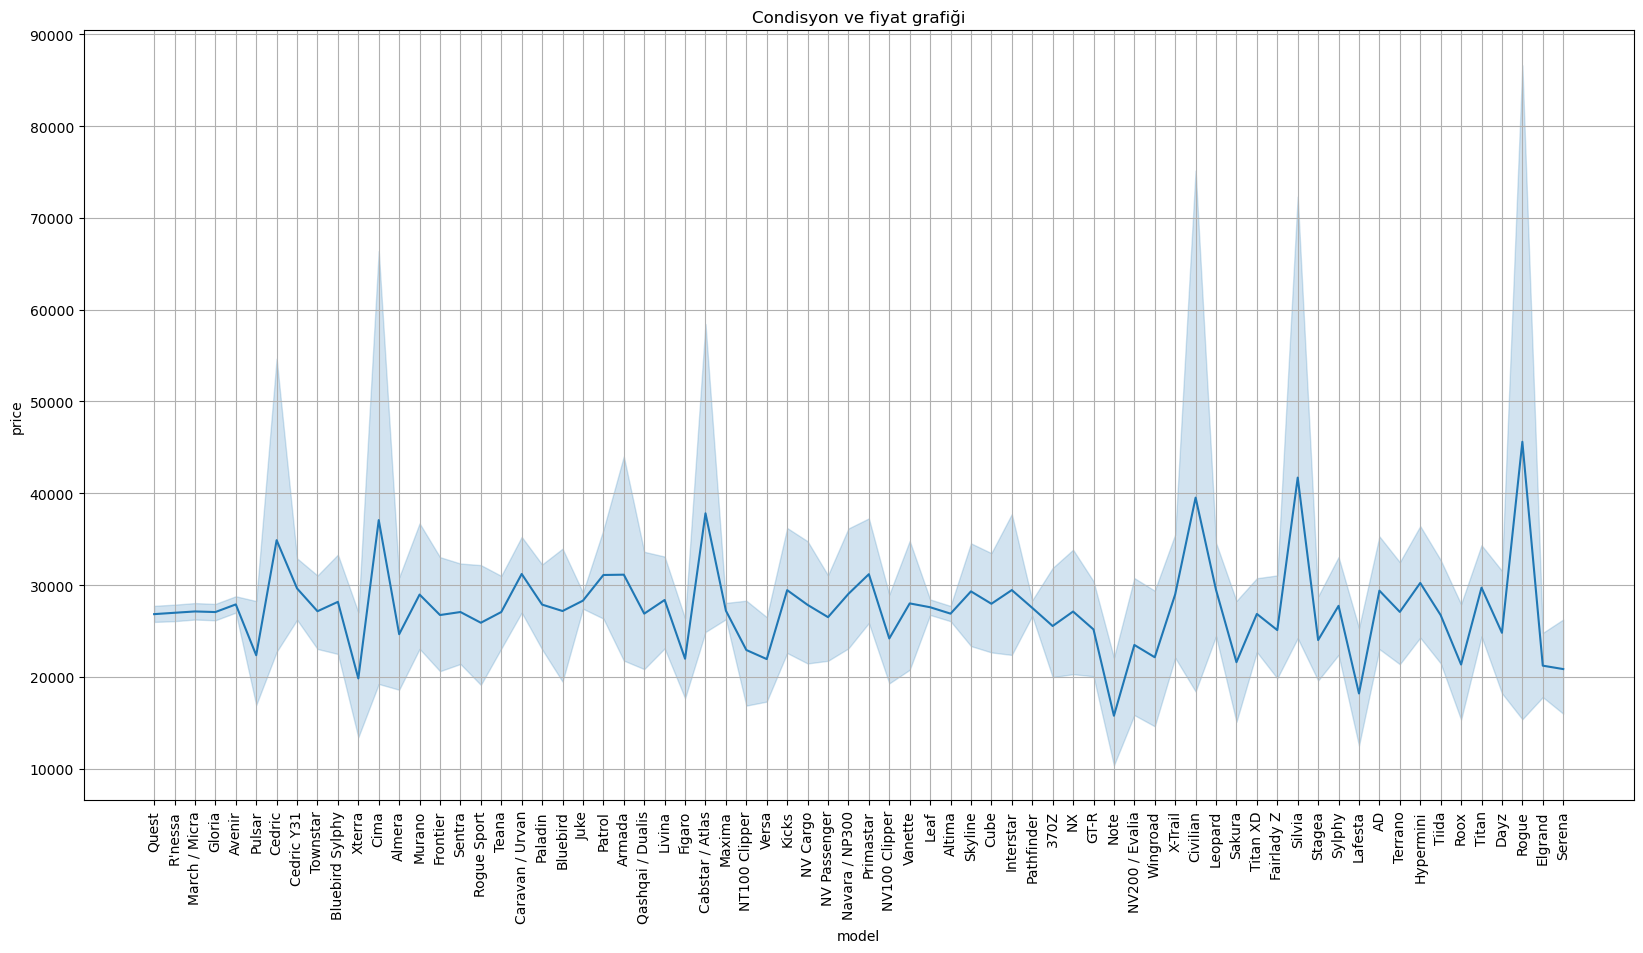

In [31]:
plt.figure(figsize=(20,10))

sns.lineplot(x = "model", y = "price", data = df);
plt.title("Condisyon ve fiyat grafiği");
plt.grid(True);
plt.xticks(rotation = 90);

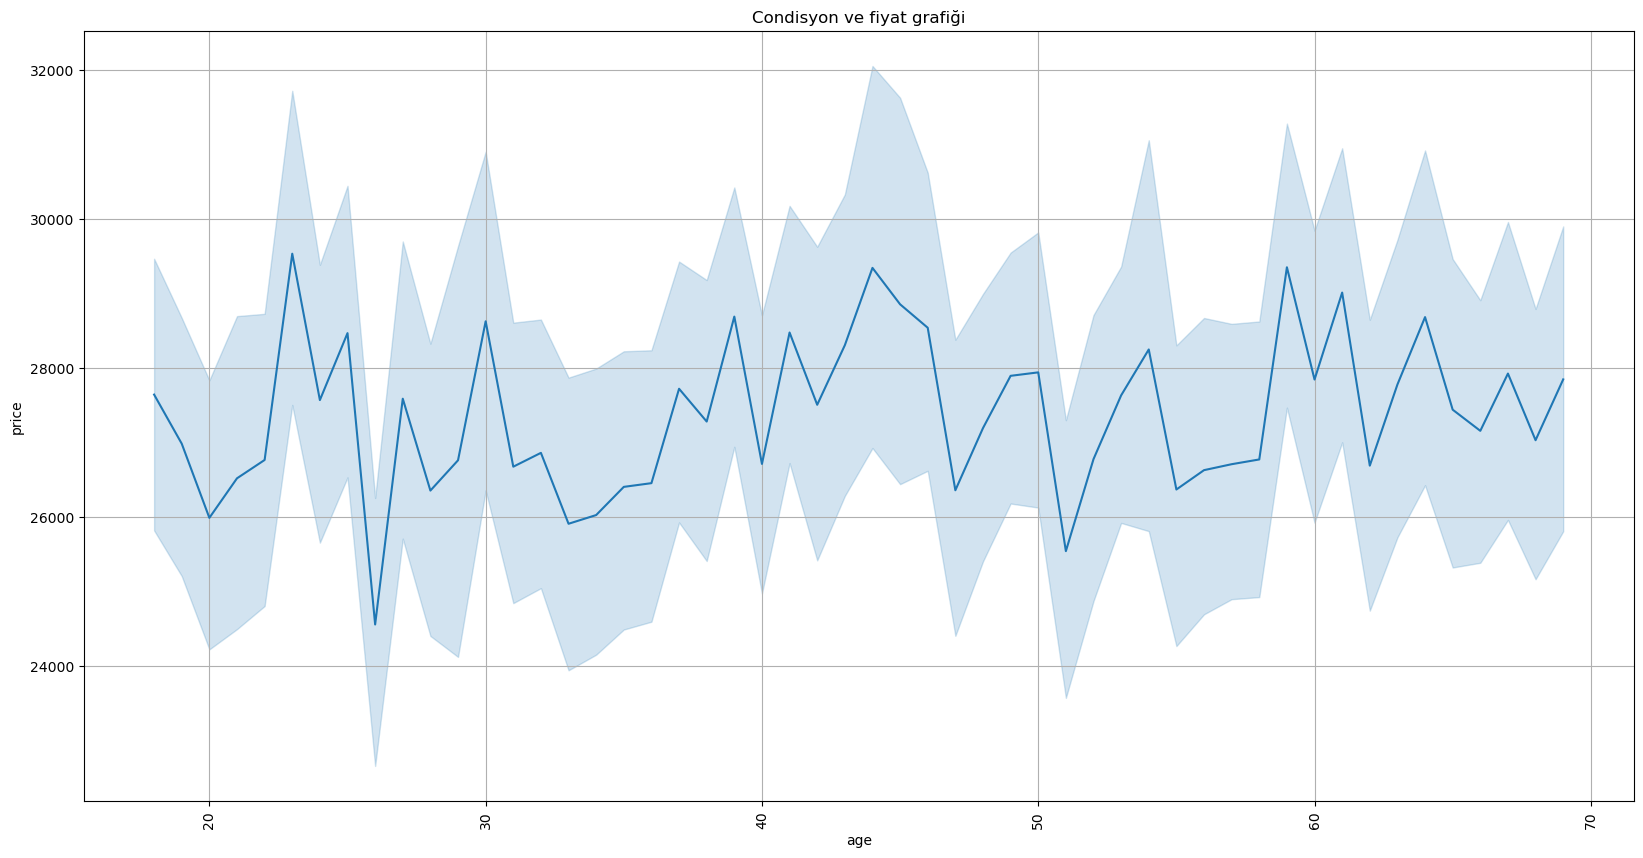

In [34]:
plt.figure(figsize=(20,10))

sns.lineplot(x = "age", y = "price", data = df);
plt.title("Condisyon ve fiyat grafiği");
plt.grid(True);
plt.xticks(rotation = 90);

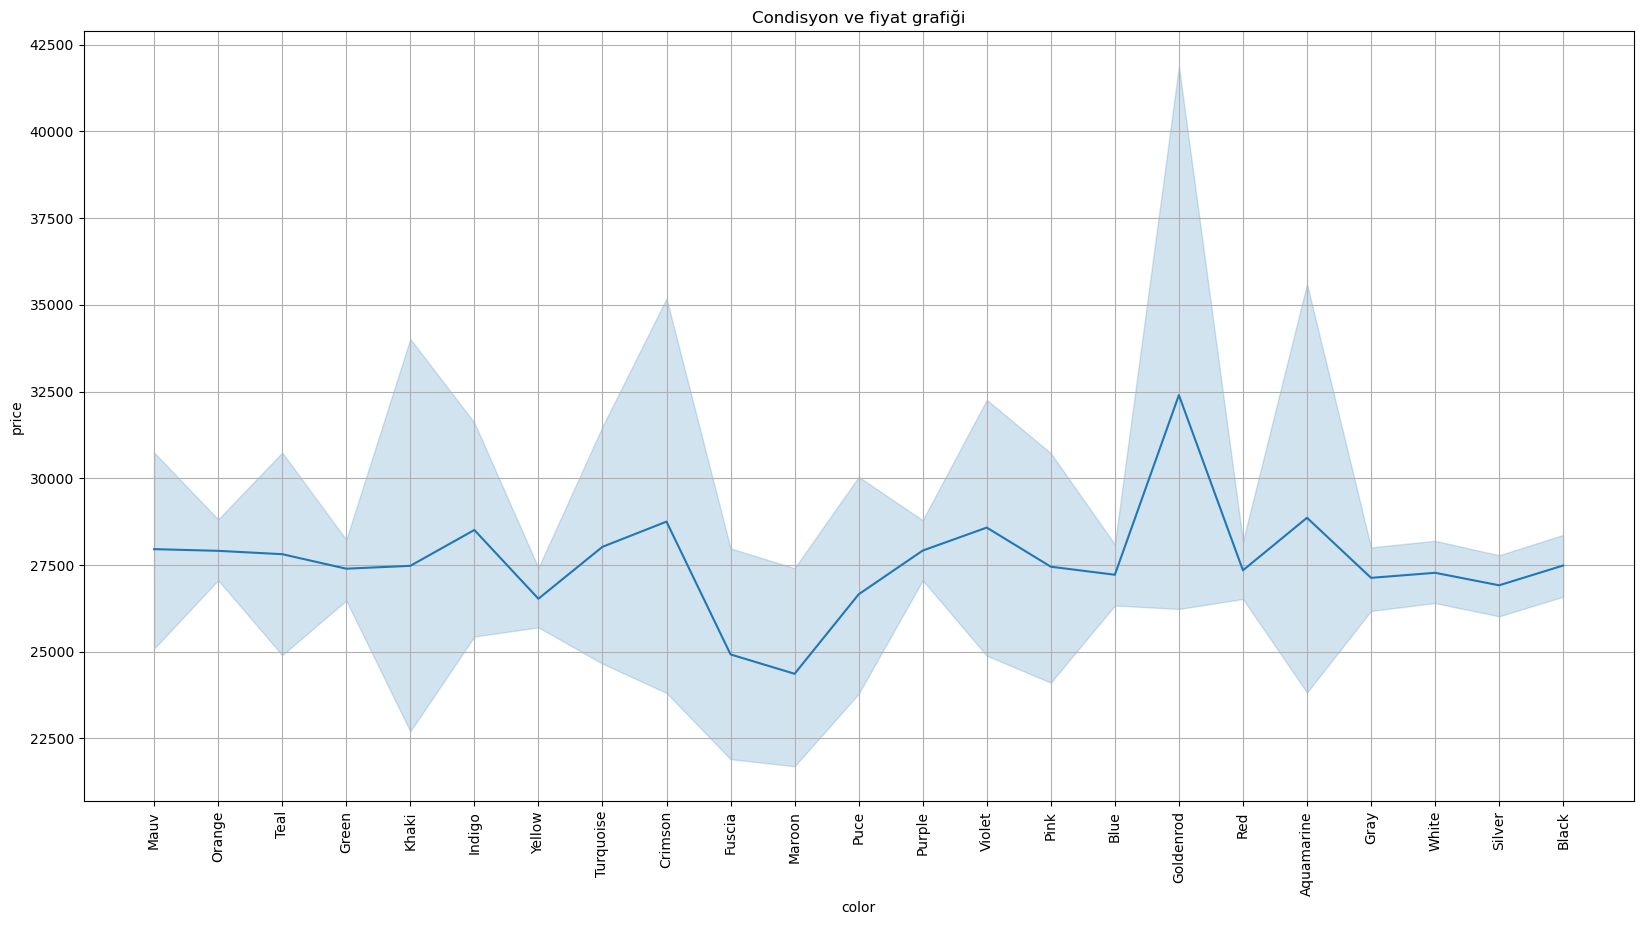

In [35]:
plt.figure(figsize=(20,10))

sns.lineplot(x = "color", y = "price", data = df);
plt.title("Condisyon ve fiyat grafiği");
plt.grid(True);
plt.xticks(rotation = 90);

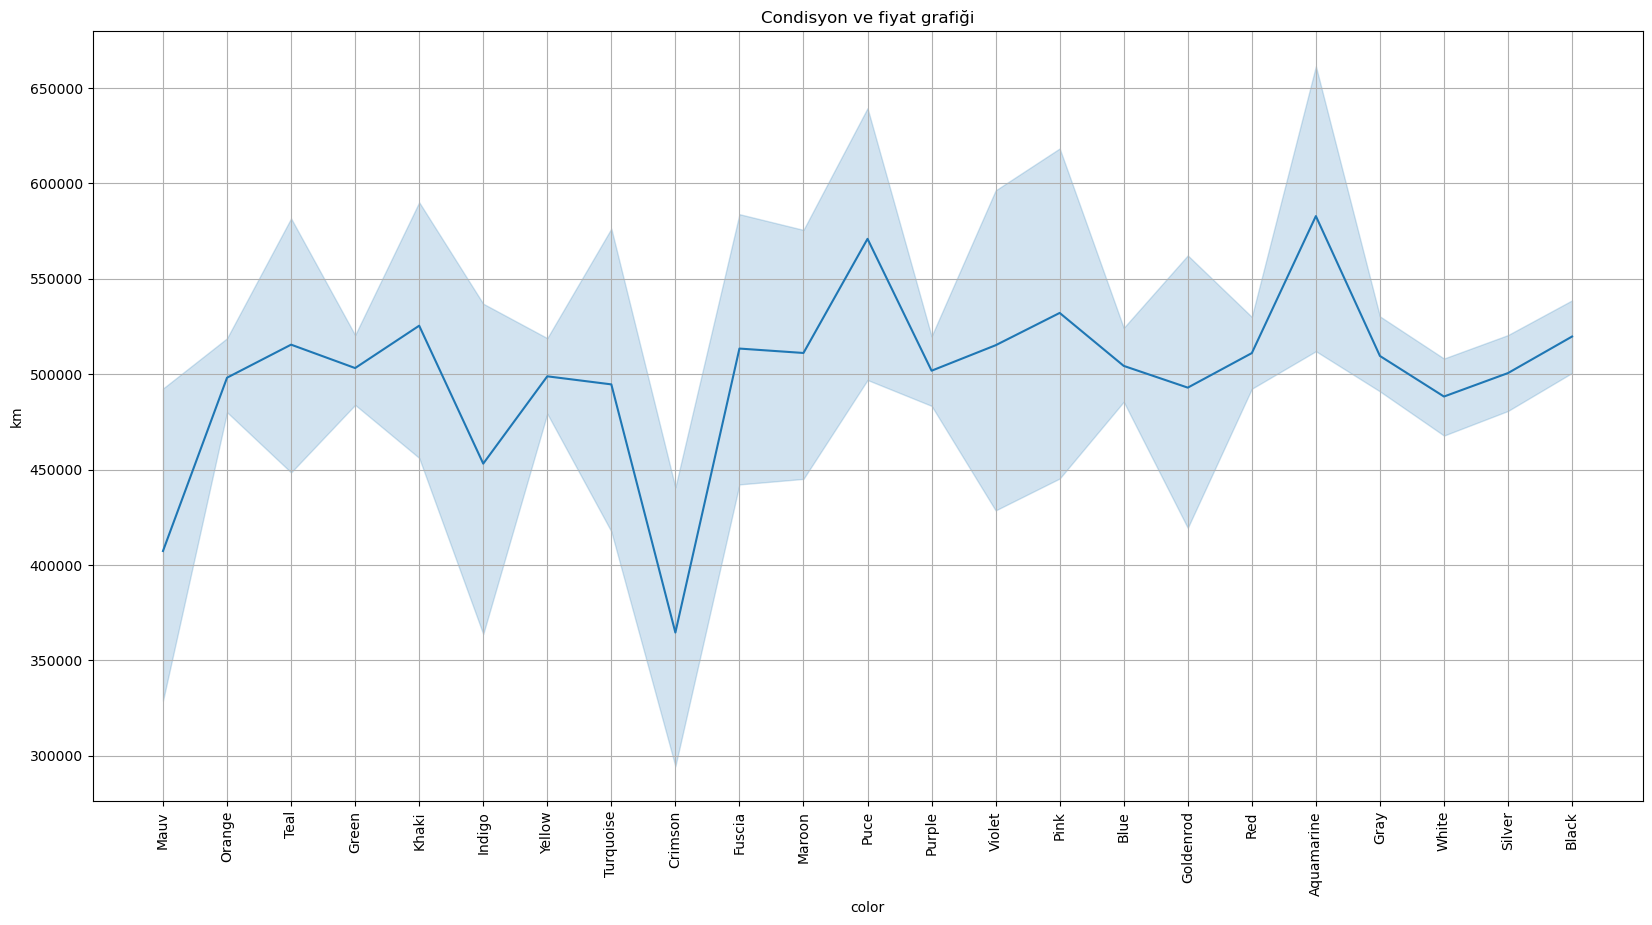

In [36]:
plt.figure(figsize=(20,10))

sns.lineplot(x = "color", y = "km", data = df);
plt.title("Condisyon ve fiyat grafiği");
plt.grid(True);
plt.xticks(rotation = 90);

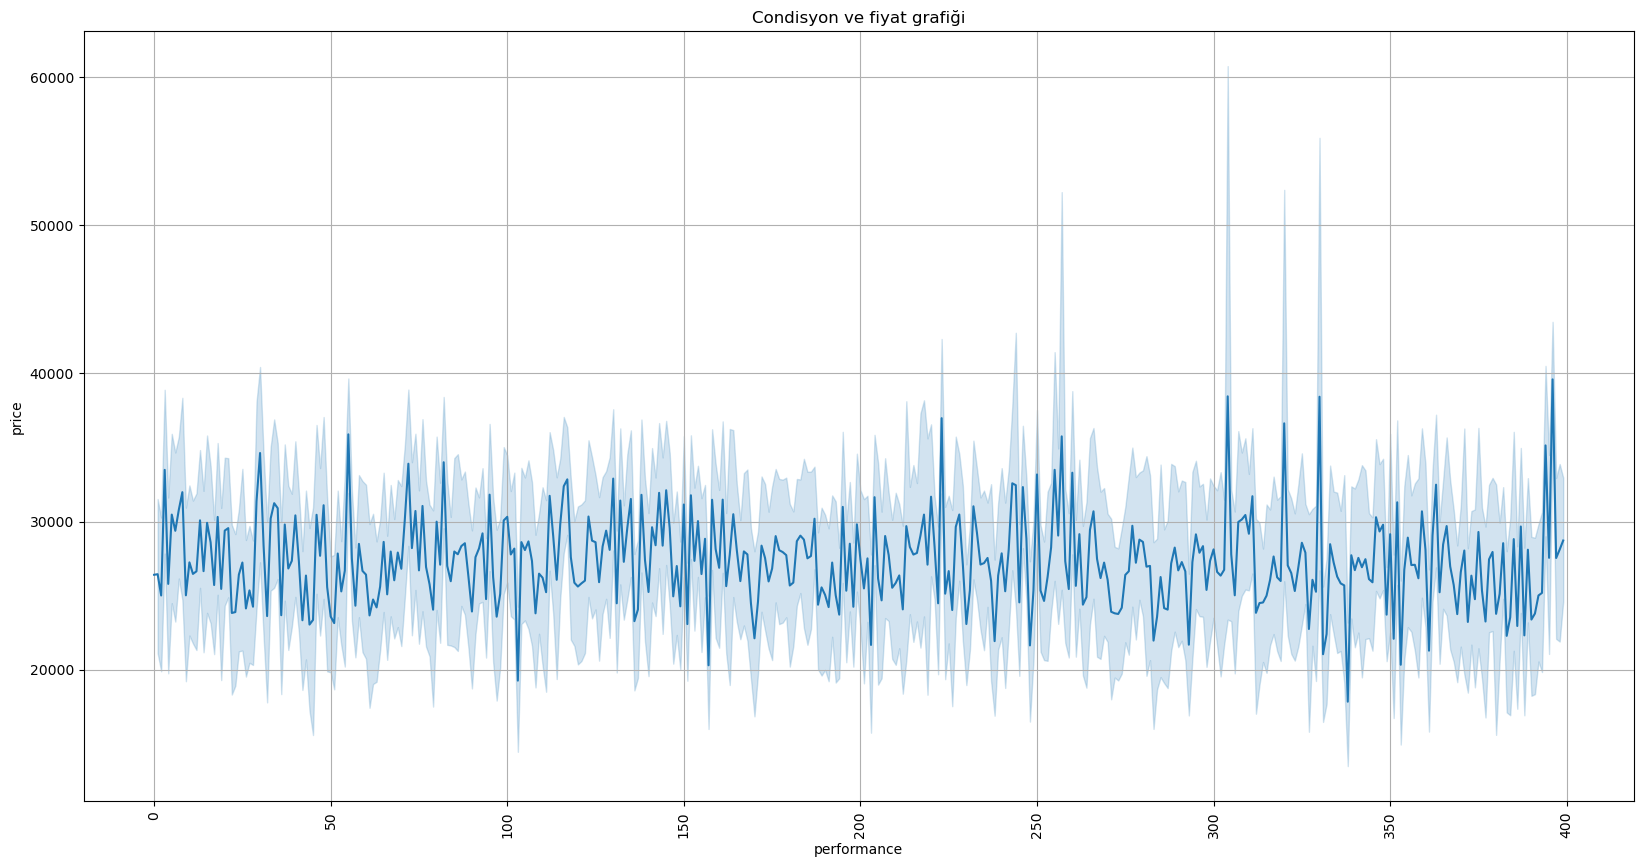

In [38]:
plt.figure(figsize=(20,10))

sns.lineplot(x = "performance", y = "price", data = df);
plt.title("Condisyon ve fiyat grafiği");
plt.grid(True);
plt.xticks(rotation = 90);

### Modellemeye başlama

In [84]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

In [81]:
# Eksik verileri kontrol edin
print("Eksik Verilerin Sayısı:")
print(df.isnull().sum())

Eksik Verilerin Sayısı:
id             0
full_name      0
age            0
gender         0
model          0
color          0
performance    0
km             0
condition      0
price          0
dtype: int64


In [82]:
# Eksik verileri içeren satırları kaldırın
df = df.dropna()

# Eksik verileri tekrar kontrol edin
print("\nTemizlenmiş Veri Setinin Özeti:")
print(df.info())


Temizlenmiş Veri Setinin Özeti:
<class 'pandas.core.frame.DataFrame'>
Index: 9053 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9053 non-null   int64  
 1   full_name    9053 non-null   object 
 2   age          9053 non-null   float64
 3   gender       9053 non-null   int32  
 4   model        9053 non-null   int32  
 5   color        9053 non-null   int32  
 6   performance  9053 non-null   float64
 7   km           9053 non-null   float64
 8   condition    9053 non-null   int32  
 9   price        9053 non-null   float64
dtypes: float64(4), int32(4), int64(1), object(1)
memory usage: 636.5+ KB
None


In [64]:
# Kategorik özellikleri sayısal değerlere dönüştürün
label_encoders = {}
for column in ['gender', 'model', 'color', 'condition']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Veriyi kontrol edin
df.head()

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,5,4,3,299.0,509305.0,4,40394.91
1,2,Lenee Eteen,54.0,7,16,5,109.0,965853.0,3,8687.90
2,3,Kendal Esselin,37.0,5,53,7,52.0,380906.0,0,44705.31
3,4,Nehemiah Marvelley,55.0,5,26,17,336.0,573171.0,5,32889.88
4,5,Domenic McGeouch,21.0,5,64,2,2.0,809470.0,3,6949.22


In [65]:
# Özellikler ve hedef değişkeni ayırın
X = df[['age', 'gender', 'model', 'color', 'performance', 'km', 'condition']]
y = df['price']

# Veriyi standartlaştırın
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
# Veriyi eğitim ve test kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [85]:
# Modelleri tanımlayın
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': CatBoostRegressor(silent=True)
}

# Her bir model için çapraz doğrulama ve performansı değerlendirin
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -cv_scores.mean()
    results[name] = mean_cv_score
    print(f"{name} Mean Squared Error (Cross-Validation): {mean_cv_score}")

Linear Regression Mean Squared Error (Cross-Validation): 181427771.78595683
Ridge Regression Mean Squared Error (Cross-Validation): 181427702.0358405
Lasso Regression Mean Squared Error (Cross-Validation): 181427477.74550036
Decision Tree Mean Squared Error (Cross-Validation): 359770807.81647456
Random Forest Mean Squared Error (Cross-Validation): 192142432.7103671
Gradient Boosting Mean Squared Error (Cross-Validation): 182818267.88464206
SVR Mean Squared Error (Cross-Validation): 181320259.80753464
KNN Mean Squared Error (Cross-Validation): 216695339.47416887
XGBoost Mean Squared Error (Cross-Validation): 212207942.90256172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 7242, number of used features: 7
[LightGBM] [Info

In [88]:
# En iyi performansa sahip modeli belirleyin
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"\nEn İyi Model: {best_model_name}")


En İyi Model: SVR


In [89]:
# Hiperparametre optimizasyonunu en iyi model için yapın
param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 10]
    },
    'Lasso Regression': {
        'alpha': [0.1, 1, 10]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'SVR': {
        'C': [1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [5, 10, 15],
        'weights': ['uniform', 'distance']
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'CatBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'depth': [3, 5]
    }
}

best_model = None
best_params = None
best_mse = float('inf')

if best_model_name in param_grids:
    param_grid = param_grids[best_model_name]
    grid_search = GridSearchCV(models[best_model_name], param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {best_model_name}: {best_params}")

Best parameters for SVR: {'C': 1, 'kernel': 'rbf'}


#### Modele tahmin yaptırma

In [91]:
# En iyi model ile tahmin yapın
if best_model is not None:
    best_model.fit(X_train, y_train)
    y_pred_best = best_model.predict(X_test)
    mse_best = mean_squared_error(y_test, y_pred_best)
    print(f"En İyi Modelin Mean Squared Error: {mse_best}")

    # Rastgele bir örnek ile tahmin yapın
    random_index = np.random.choice(X_test.shape[0])
    example = X_test[random_index].reshape(1, -1)
    true_price = y_test.iloc[random_index]
    predicted_price = best_model.predict(example)[0]

    print(f"\nGerçek Fiyat: {true_price}")
    print(f"Tahmin Edilen Fiyat: {predicted_price}")

En İyi Modelin Mean Squared Error: 168549634.91606635

Gerçek Fiyat: 25517.31
Tahmin Edilen Fiyat: 27431.041260868275


### tkinter ile bir gui ile özellik seçimi yapıp tahmin eden model

In [98]:
# Kullanıcıdan bilgi alarak tahmin yapma
def predict_price(age, gender, model, color, performance, km, condition):
    # Kategorik özelliklerin sayısal değerlere dönüştürülmesi
    gender_encoded = label_encoders['gender'].transform([gender])[0] if gender in label_encoders['gender'].classes_ else -1
    model_encoded = label_encoders['model'].transform([model])[0] if model in label_encoders['model'].classes_ else -1
    color_encoded = label_encoders['color'].transform([color])[0] if color in label_encoders['color'].classes_ else -1
    condition_encoded = label_encoders['condition'].transform([condition])[0] if condition in label_encoders['condition'].classes_ else -1

    # Özelliklerin DataFrame'e dönüştürülmesi
    user_input = pd.DataFrame({
        'age': [age],
        'gender': [gender_encoded],
        'model': [model_encoded],
        'color': [color_encoded],
        'performance': [performance],
        'km': [km],
        'condition': [condition_encoded]
    })

    # Özelliklerin standartlaştırılması
    user_input_scaled = scaler.transform(user_input)

    # Tahmin yapma
    predicted_price = best_model.predict(user_input_scaled)[0]
    return predicted_price

In [100]:
import tkinter as tk
from tkinter import ttk

# Tkinter GUI
def on_predict():
    age = int(age_var.get())
    gender = gender_combobox.get()
    model_name = model_combobox.get()
    color = color_combobox.get()
    performance = float(performance_var.get())
    km = float(km_var.get())
    condition = condition_combobox.get()

    predicted_price = predict_price(age, gender, model_name, color, performance, km, condition)
    result_label.config(text=f"Tahmin Edilen Fiyat: {predicted_price:.2f}")

root = tk.Tk()
root.title("Araç Fiyat Tahmini")

# Yaş
tk.Label(root, text="Yaş:").grid(row=0, column=0)
age_var = tk.StringVar()
tk.Entry(root, textvariable=age_var).grid(row=0, column=1)

# Cinsiyet
tk.Label(root, text="Cinsiyet:").grid(row=1, column=0)
gender_var = tk.StringVar()
gender_combobox = ttk.Combobox(root, textvariable=gender_var, values=['Male', 'Female'])
gender_combobox.grid(row=1, column=1)

# Araç Modeli
tk.Label(root, text="Araç Modeli:").grid(row=2, column=0)
model_var = tk.StringVar()
model_combobox = ttk.Combobox(root, textvariable=model_var, values=['Sedan', 'SUV', 'Hatchback', 'Coupe', 'Convertible'])
model_combobox.grid(row=2, column=1)

# Renk
tk.Label(root, text="Renk:").grid(row=3, column=0)
color_var = tk.StringVar()
color_combobox = ttk.Combobox(root, textvariable=color_var, values=['Red', 'Blue', 'Green', 'Black', 'White'])
color_combobox.grid(row=3, column=1)

# Performans
tk.Label(root, text="Performans:").grid(row=4, column=0)
performance_var = tk.StringVar()
tk.Entry(root, textvariable=performance_var).grid(row=4, column=1)

# Kilometre
tk.Label(root, text="Kilometre:").grid(row=5, column=0)
km_var = tk.StringVar()
tk.Entry(root, textvariable=km_var).grid(row=5, column=1)

# Kondisyon
tk.Label(root, text="Kondisyon:").grid(row=6, column=0)
condition_var = tk.StringVar()
condition_combobox = ttk.Combobox(root, textvariable=condition_var, values=['Good', 'Fair', 'Poor'])
condition_combobox.grid(row=6, column=1)

# Tahmin Butonu
predict_button = tk.Button(root, text="Tahmin Et", command=on_predict)
predict_button.grid(row=7, column=0, columnspan=2)

# Sonuç Label
result_label = tk.Label(root, text="")
result_label.grid(row=8, column=0, columnspan=2)

root.mainloop()

## Sonuç

Bu projede, araç fiyatlarının çeşitli faktörlere göre tahmin edilmesi üzerine odaklanılmıştır. Kullanılan veri seti, araçların fiyatlarını etkileyen temel özellikleri içermektedir: yaş, kondisyon, kilometre, renk ve performans. Elde edilen bulgulara göre, araç fiyatları üzerinde önemli etkileri olan faktörler aşağıda özetlenmiştir:

- **Yaş**: Araç yaşının fiyat üzerindeki etkisi, modelin doğruluğunu büyük ölçüde artırmıştır. Genelde daha yeni araçlar, yüksek fiyatlarla tahmin edilmiştir. Araç yaşının fiyat üzerindeki bu belirgin etkisi, modelleme sürecinde yaş değişkeninin önemini ortaya koymuştur.

- **Kondisyon**: Araçların kondisyonu, fiyat tahminlerinde önemli bir rol oynamıştır. İyi durumda olan araçlar, genellikle daha yüksek fiyatlarla tahmin edilmiştir. Bu durum, kullanıcıların araçlarının kondisyonunu değerlendirmede ve fiyatlandırmada dikkate alınması gereken bir faktör olduğunu göstermektedir.

- **Kilometre**: Araç kilometresi de fiyat tahminlerinde kritik bir etkendir. Düşük kilometreye sahip araçlar, genellikle daha yüksek fiyatlarla tahmin edilmiştir. Kilometre, araçların genel durumunu ve değerini belirleyen önemli bir değişken olarak modelde yer almıştır.

- **Renk**: Araç renginin fiyat üzerindeki etkisi, bazı renkler için belirgin olmuştur. Belirli renklerin, diğerlerinden daha yüksek fiyatlarla ilişkilendirildiği gözlemlenmiştir. Renk seçiminin, araç fiyatları üzerindeki etkisini anlamak, kullanıcıların araç alım-satım süreçlerinde daha bilinçli kararlar vermesine yardımcı olabilir.

- **Performans**: Araç performansı da fiyat tahminlerinde önemli bir faktördür. Yüksek performanslı araçlar, genellikle daha yüksek fiyatlarla tahmin edilmiştir. Bu, araçların performansının, fiyatlandırma üzerinde doğrudan bir etkisi olduğunu göstermektedir.

**Genel Değerlendirme**: Elde edilen sonuçlar, araç fiyatlarının yaş, kondisyon, kilometre, renk ve performans gibi çeşitli faktörlerden etkilenerek belirlendiğini açıkça göstermektedir. Modelin bu faktörleri dikkate alarak doğru tahminler yapabilmesi, fiyatlandırma süreçlerinde bu özelliklerin önemini vurgulamaktadır. Proje, araç fiyatlarını etkileyen bu temel değişkenleri anlamak ve değerlendirmek için etkili bir yöntem sunmuş olup, gelecekte bu özelliklerin daha detaylı incelenmesi ve modelin daha fazla veri ile test edilmesi, tahminlerin doğruluğunu artırabilir.
